# Boston Housing Price Prediction Project
In this case study, our task is to create a machine learning model which can predict the price of the homes based on its characteristics.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

## 1. Reading the data into python
This is one of the most important steps in machine learning! We must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "BostonHousingData.csv". This file contains 506 house details from the Boston city.

### Data description
The business meaning of each column in the data is as below


* <b>CRIM</b>: per capita crime rate by town
* <b>ZN</b>: proportion of residential land zoned for lots over 25,000 sq.ft.
* <b>INDUS</b>: proportion of non-retail business acres per town.
* <b>CHAS</b>: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* <b>NOX</b>: nitric oxides concentration (parts per 10 million)
* <b>RM</b>: average number of rooms per dwelling
* <b>AGE</b>: proportion of owner-occupied units built prior to 1940
* <b>DIS</b>: weighted distances to five Boston employment centres
* <b>RAD</b>: index of accessibility to radial highways
* <b>TAX</b>: full-value property-tax rate per 10,000 dollars
* <b>PTRATIO</b>: pupil/teacher ratio by town
* <b>B</b>: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* <b>LSTAT</b>: % lower status of the population
* <b>MEDV</b>: Median value of owner-occupied homes in $1000's

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np
BostonHousingData=pd.read_csv('BostonHousingData.csv', encoding='latin')
print('Shape before deleting duplicates:',BostonHousingData.shape)

# Removing duplicate rows if any
BostonHousingData=BostonHousingData.drop_duplicates()
print('Shape after deleting duplicates:',BostonHousingData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BostonHousingData.head(10)

Shape before deleting duplicates: (506, 14)
Shape after deleting duplicates: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## 2. Defining the problem statement:
Create a ML model which predict the price of the homes based on its characteristics.
* Target Variable: MEDV
* Predictors: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT.

## 3. Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

## 4. Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

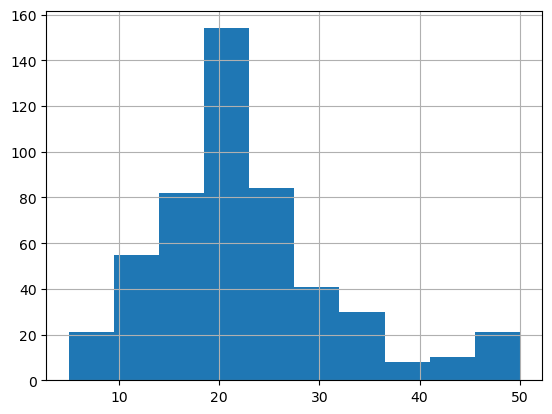

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
BostonHousingData['MEDV'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## 5. Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the price of the house?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
​
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [5]:
# Looking at sample rows in the data
BostonHousingData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BostonHousingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [7]:
# Looking at the descriptive statistics of the data
BostonHousingData.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BostonHousingData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

#### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created


* <b>MEDV</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>CRIM</b>: Continuous. Selected.
* <b>ZN</b>: Continuous. Selected.
* <b>INDUS</b>: Continuous. Selected.
* <b>CHAS</b>: Categorical. Selected.
* <b>NOX</b>: Continuous. Selected.
* <b>RM</b>: Continuous. Selected.
* <b>AGE</b>: Continuous. Selected.
* <b>DIS</b>: Continuous. Selected.
* <b>RAD</b>: Categorical. Selected.
* <b>TAX</b>: Continuous. Selected.
* <b>PTRATIO</b>: Continuous. Selected.
* <b>B</b>: Continuous. Selected.
* <b>LSTAT</b>: Continuous. Selected.

## 6. Removing useless columns from the data
There are no qualitative columns in this data

## 7. Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

<b>Categorical Predictors</b>:
'CHAS', 'RAD'

We use bar charts to see how the data is distributed for these categorical columns.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(10,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

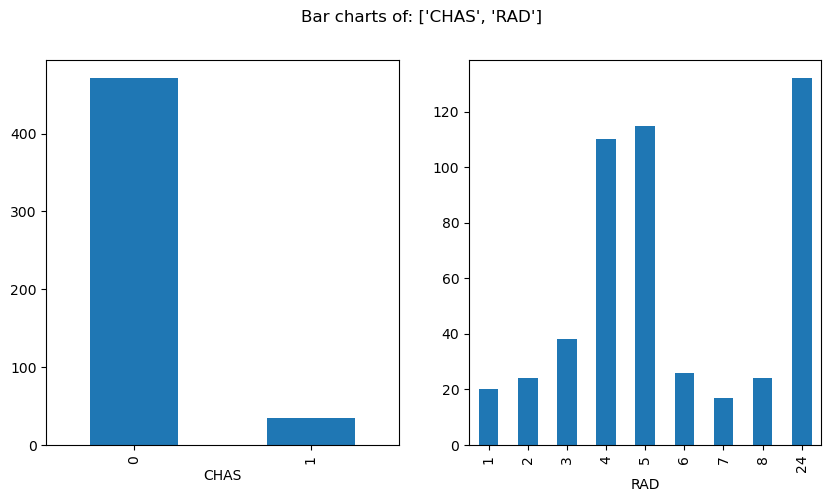

In [10]:
# Calling the function
PlotBarCharts(inpData=BostonHousingData, colsToPlot=['CHAS', 'RAD'])

#### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

'CHAS' shows skewed distribution.There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'CHAS', 'RAD'

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, eleven continuous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' and 'LSTAT'.



array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

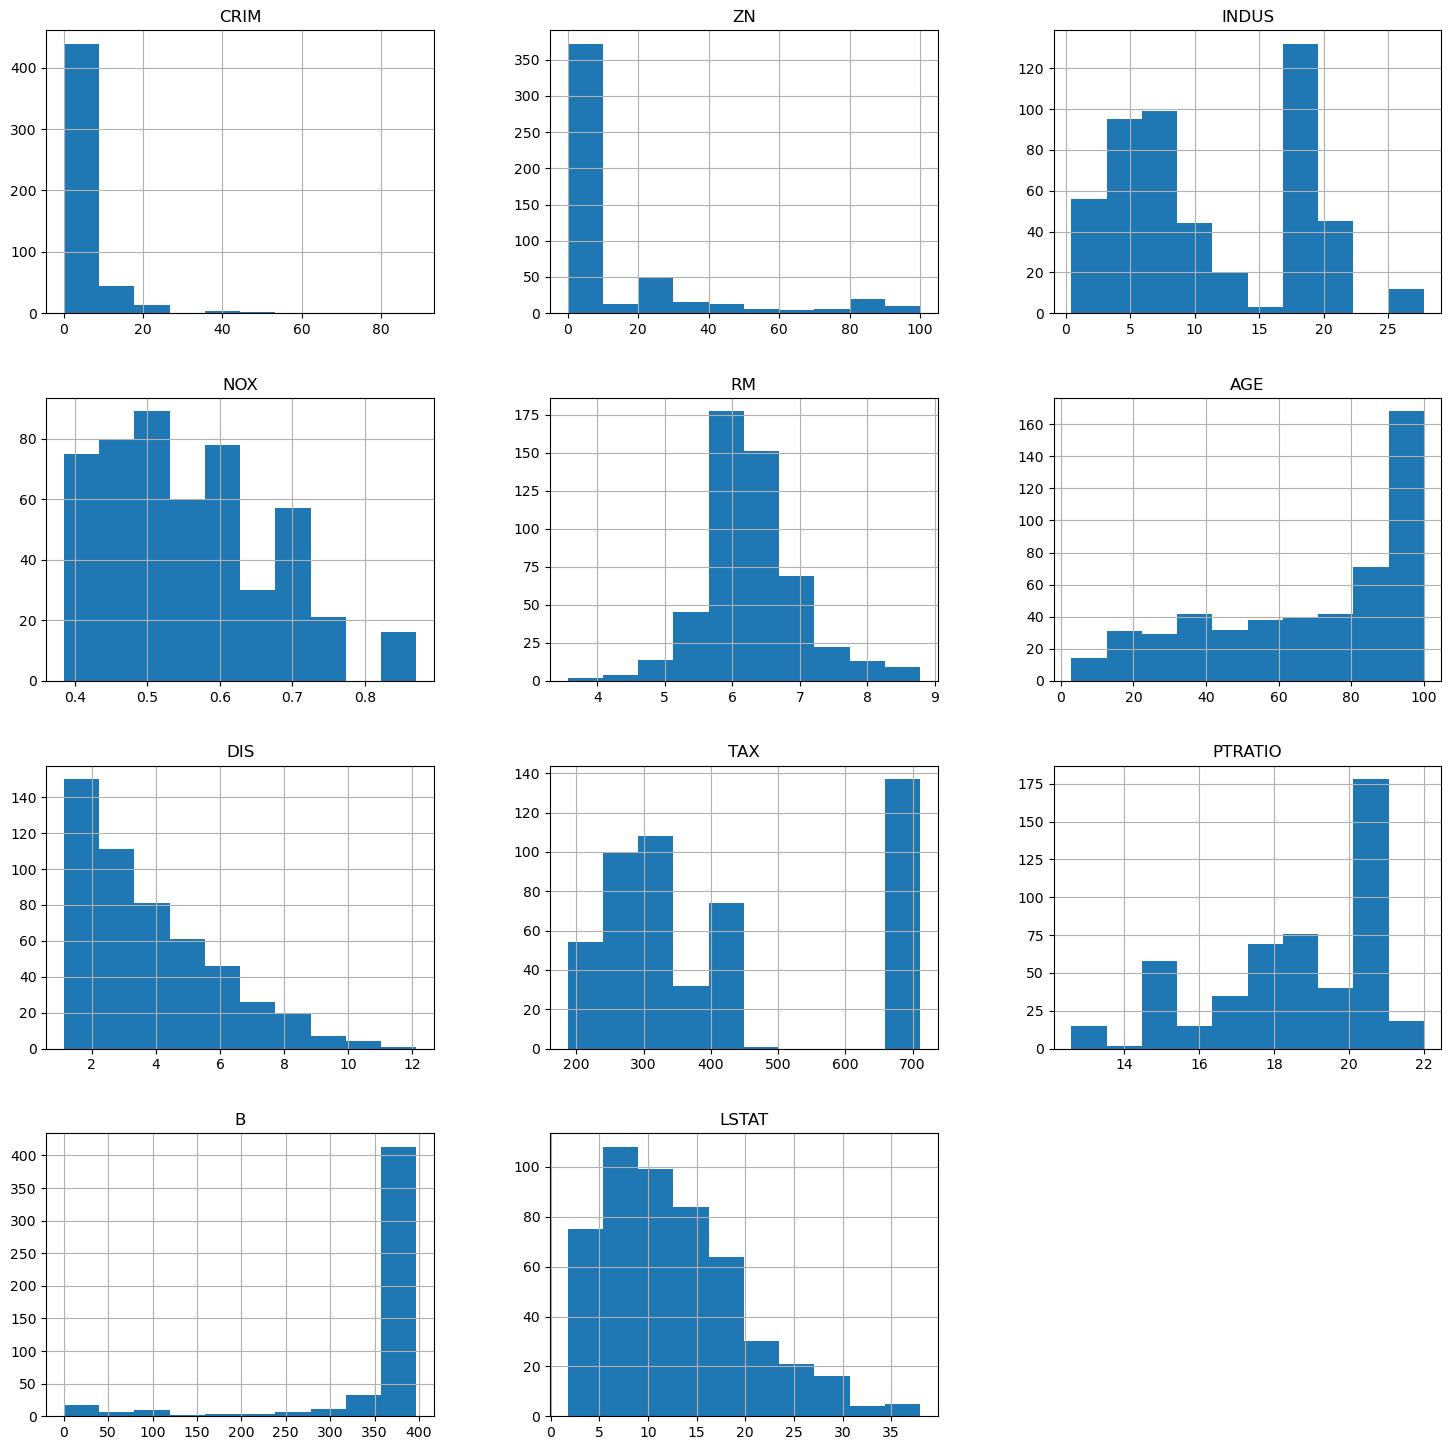

In [11]:
# Plotting histograms of multiple columns together
BostonHousingData.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], figsize=(18,18))

#### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.
​
The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "B", there are around 450 rows in data that has a value between 350 to 400.
​
The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.
​
<b>Selected Continuous Variables:</b>
* <b>CRIM</b> : Selected. There are some outliers beyond 40. Need to treat them.
* <b>ZN</b>: Selected. The distribution is good.
* <b>INDUS</b>: Selected. The distribution is good.
* <b>NOX</b>: Selected. The distribution is good.
* <b>RM</b>: Selected. The distribution is good.
* <b>AGE</b>: Selected. The distribution is good.
* <b>DIS</b>: Selected. The distribution is good.
* <b>TAX</b>: Selected. The distribution is good.
* <b>PTRATIO</b>: Selected. The distribution is good.
* <b>B</b>: Selected. The distribution is good.
* <b>LSTAT</b>: Selected. The distribution is good.
​

## 8. Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

#### Treating outliers for 'CRIM' column

In [12]:
# Finding logical value near 60
BostonHousingData['CRIM'][BostonHousingData['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

Based on the above output, the nearest logical value is 51.13580 , hence, replacing any value greater than 60 with it.

In [13]:
# Replacing outliers with nearest logical value
BostonHousingData['CRIM'][BostonHousingData['CRIM']>60]=51.13580

#### Visualizing the distribution again after outlier treatment

array([[<AxesSubplot:title={'center':'CRIM'}>]], dtype=object)

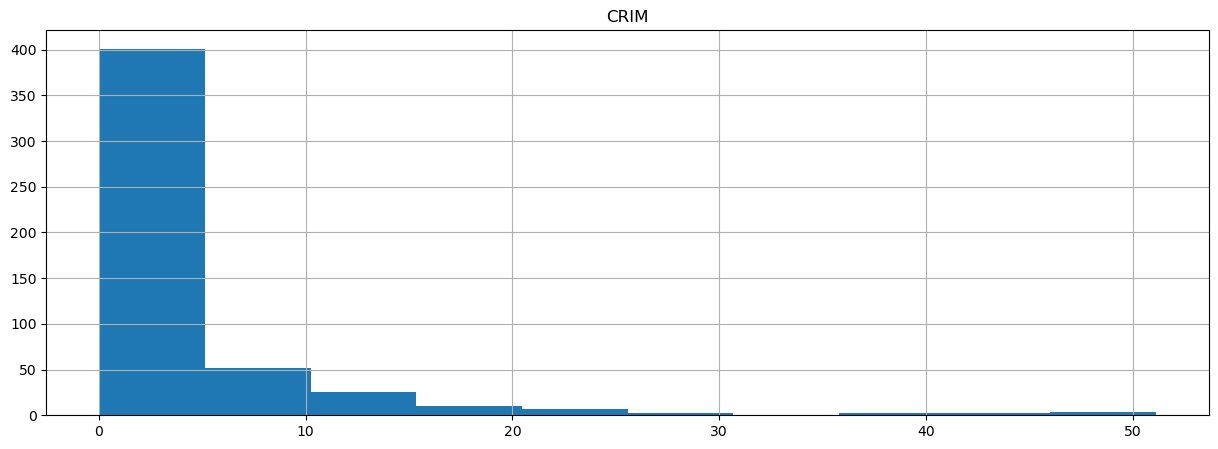

In [14]:
# Histogram for weight after outlier treatment
BostonHousingData[['CRIM']].hist(figsize=(15,5))

## 9. Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables

In [15]:
# Finding how many missing values are there for each column
BostonHousingData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##### No missing values in this data.

## 10. Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

#### In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

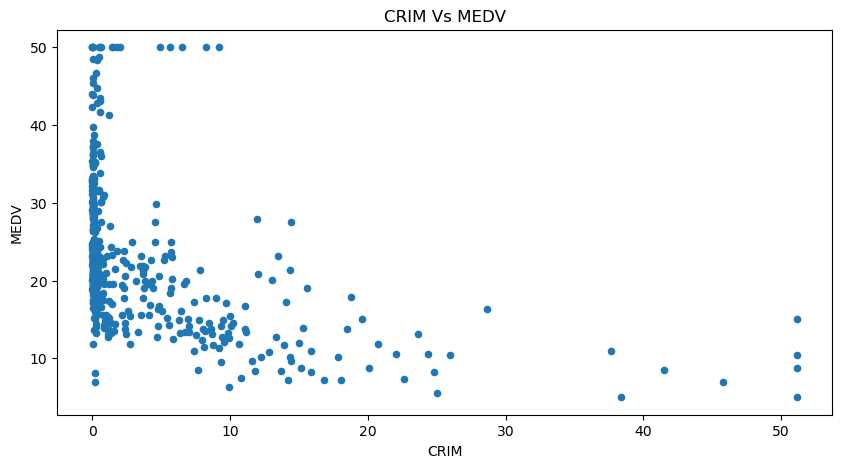

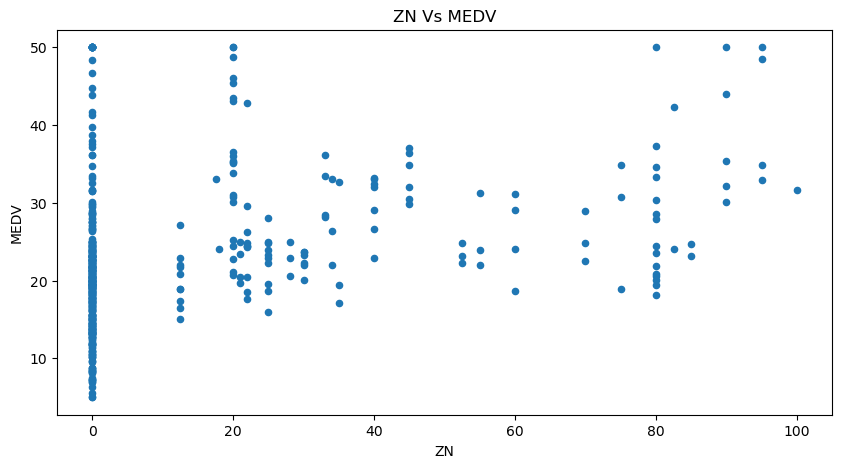

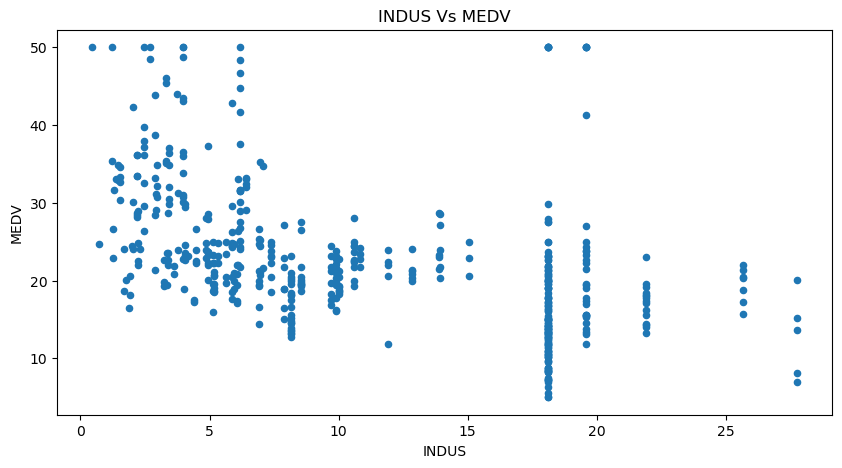

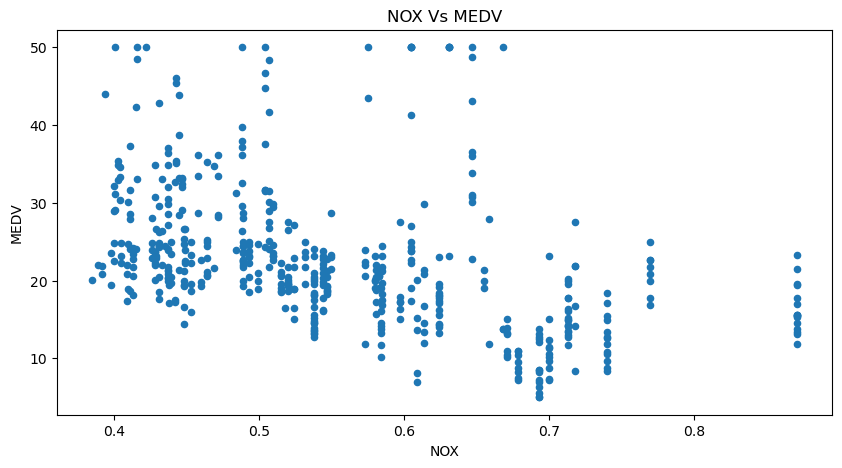

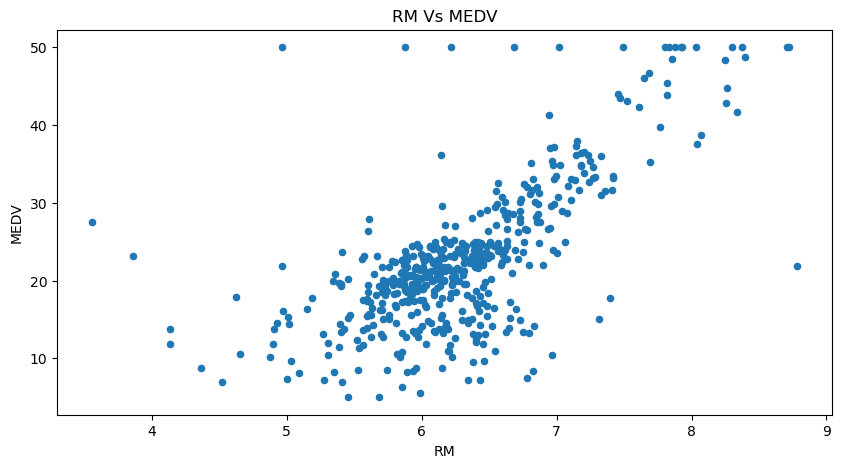

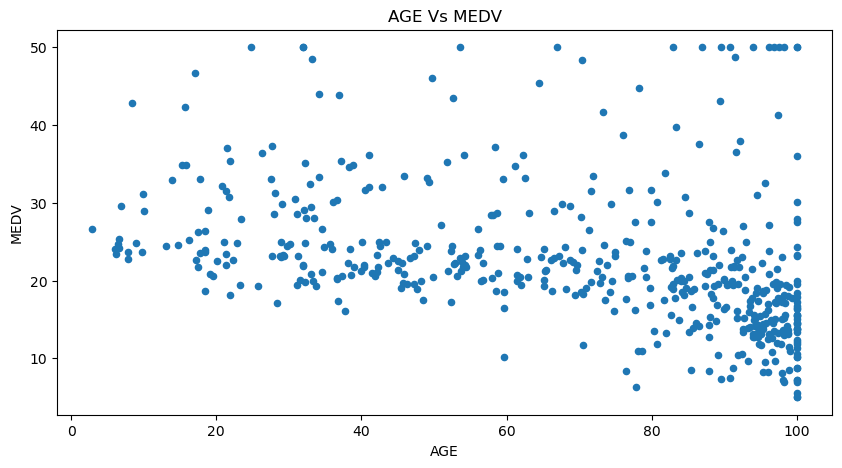

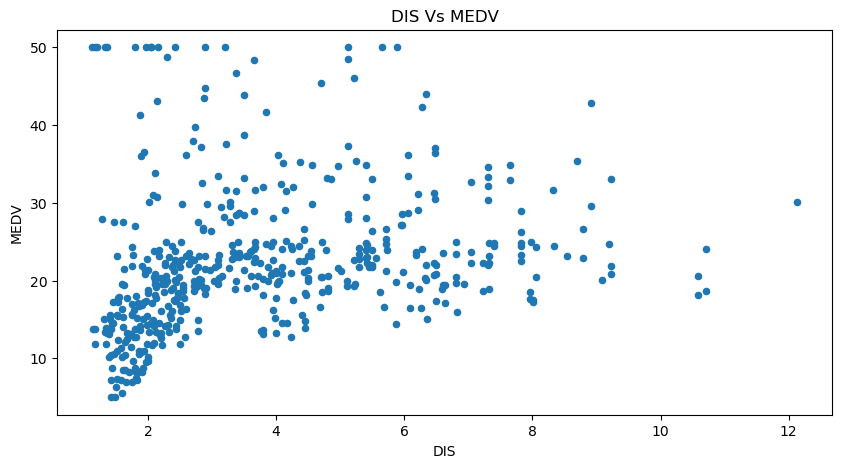

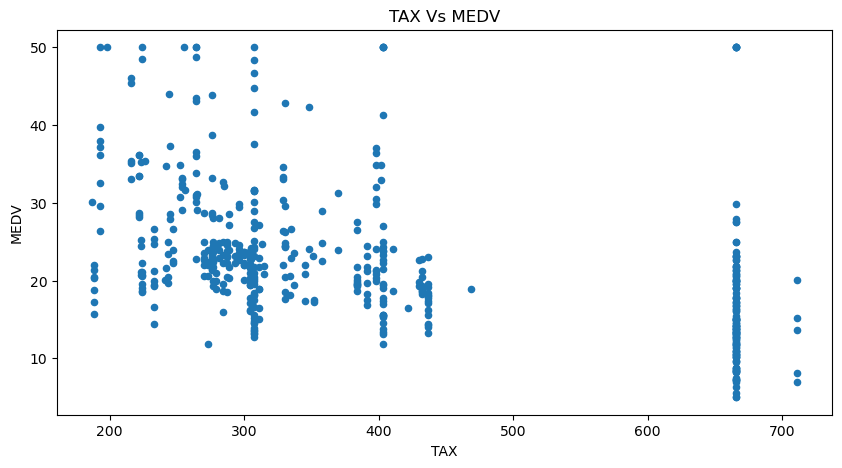

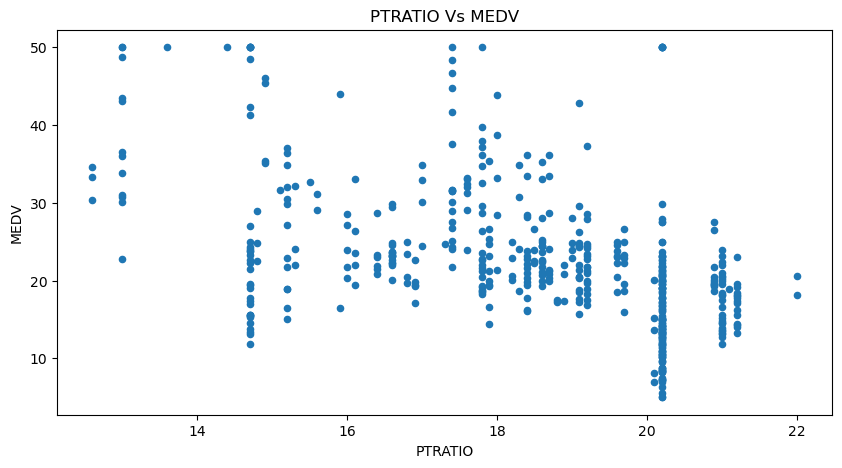

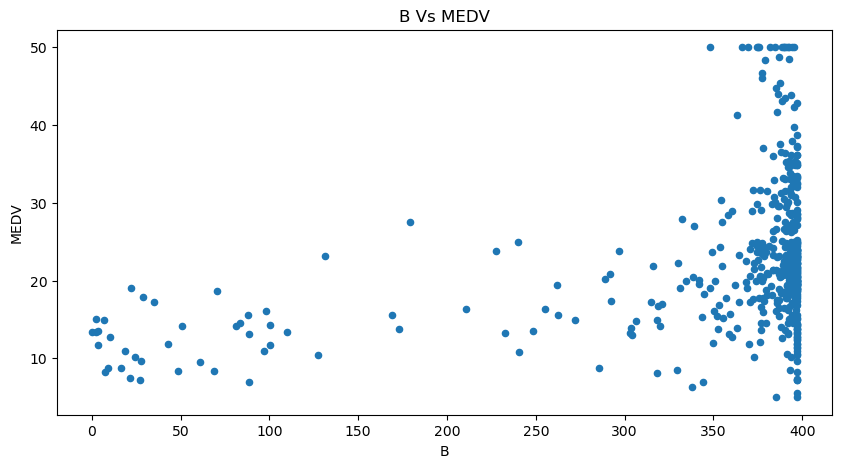

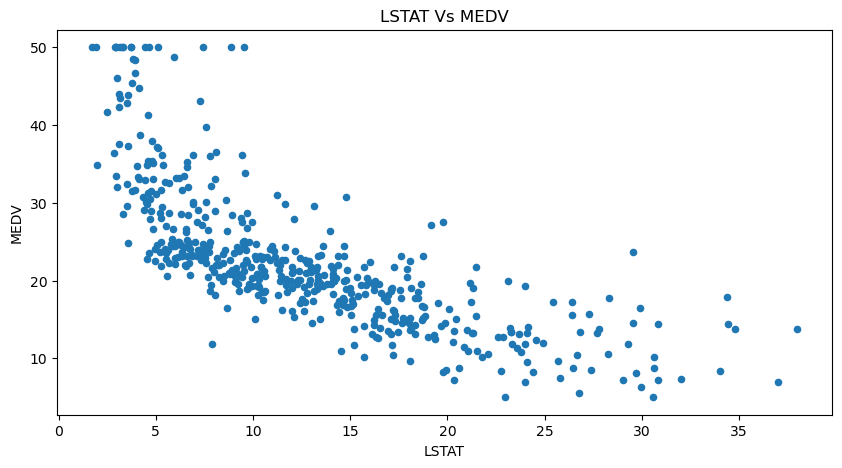

In [16]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']    

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BostonHousingData.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" Vs "+'MEDV')      
                            

### Scatter charts interpretation
<b>What should we look for in these scatter charts? </b>

Trend.
We should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
We cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart we can get a good idea about the predictor, if it will be useful or not.
We confirm this by looking at the correlation value.

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
​
Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

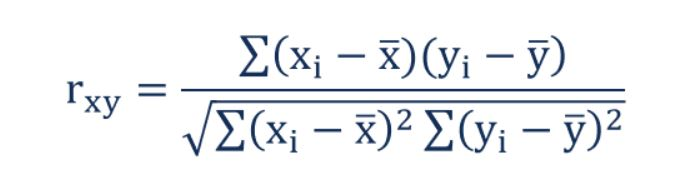

This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [17]:
# Calculating correlation matrix
ContinuousCols=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']    

# Creating the correlation matrix
CorrelationData=BostonHousingData[ContinuousCols].corr()
CorrelationData

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.419260,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.419260,1.000000,-0.222328,0.450366,0.466011,-0.257302,0.388777,-0.417934,0.643985,0.319484,-0.429850,0.508473
ZN,0.360445,-0.222328,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.450366,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.466011,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.257302,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.388777,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.417934,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.643985,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.319484,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [18]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['MEDV'][abs(CorrelationData['MEDV']) > 0.5 ]

MEDV       1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

#### Final selected Continuous columns:
'RM','PTRATIO','LSTAT'

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test


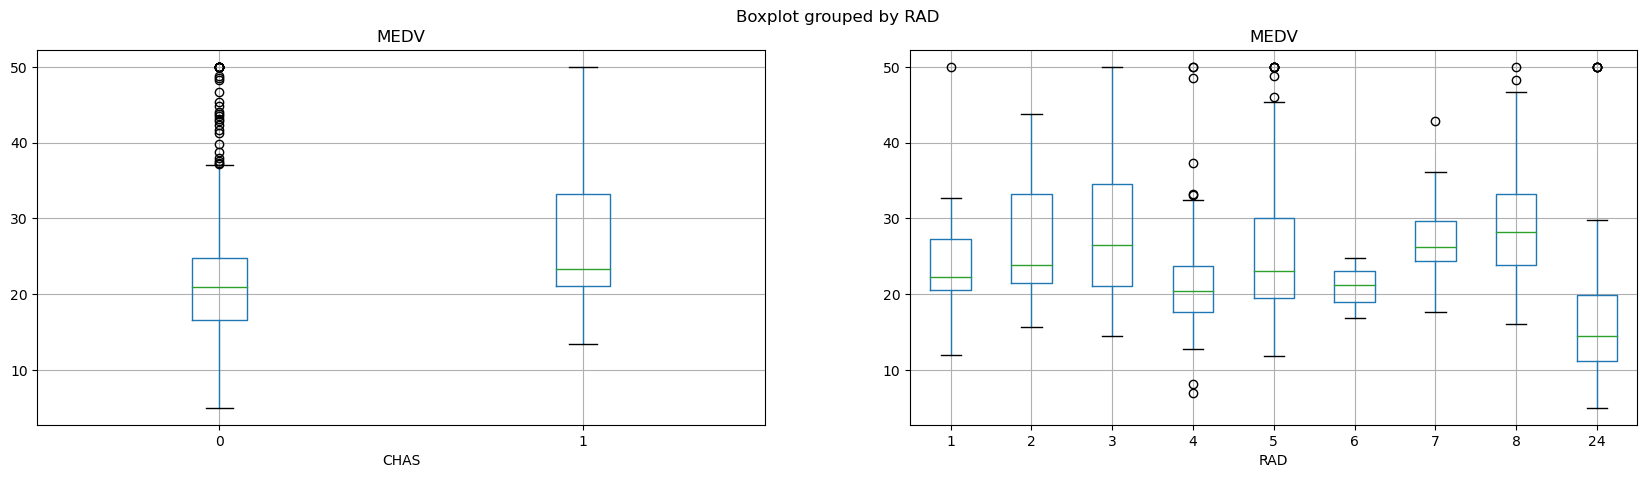

In [19]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['CHAS', 'RAD']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(20,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BostonHousingData.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Box-Plots interpretation
What should we look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

We confirm this by looking at the results of ANOVA test below

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [20]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [21]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['CHAS', 'RAD']
FunctionAnova(inpData=BostonHousingData, 
              TargetVariable='MEDV', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

CHAS is correlated with MEDV | P-Value: 7.390623170520815e-05
RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24


['CHAS', 'RAD']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'CHAS', 'RAD'

### Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [22]:
SelectedColumns=['RM','PTRATIO','LSTAT','CHAS', 'RAD']

#Selecting final columns
DataForML=BostonHousingData[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,CHAS,RAD
0,6.575,15.3,4.98,0,1
1,6.421,17.8,9.14,0,2
2,7.185,17.8,4.03,0,2
3,6.998,18.7,2.94,0,3
4,7.147,18.7,5.33,0,3


In [23]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [24]:
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')

## 11. Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### 1. Converting each Ordinal Categorical columns to numeric
In this data there is no Ordinal categorical variable which is in string format.

#### 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
There is no binary nominal variable in string format in this data

#### 3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [25]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['MEDV']=BostonHousingData['MEDV']

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,CHAS,RAD,MEDV
0,6.575,15.3,4.98,0,1,24.0
1,6.421,17.8,9.14,0,2,21.6
2,7.185,17.8,4.03,0,2,34.7
3,6.998,18.7,2.94,0,3,33.4
4,7.147,18.7,5.33,0,3,36.2


## 12. Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [26]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'CHAS', 'RAD', 'MEDV'], dtype='object')

In [27]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'
Predictors=['RM', 'PTRATIO', 'LSTAT', 'CHAS', 'RAD']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

## 13. Standardization/Normalization of data
We can choose not to run this step if we want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if we are using KNN or Neural Networks, then this step becomes necessary.

In [28]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [29]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(354,)
(152, 5)
(152,)


## 14.1. Multiple Linear Regression

In [30]:
import time
T1=time.time()
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale
# Only if you have stadardized the target variable as well

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')
prediction=LREG.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

# Printing sample prediction values
print(TestingDataResults.head())

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

LinearRegression()
R2 Value: 0.6690948117006634

##### Model Validation and Accuracy Calculations ######
         RM   PTRATIO     LSTAT  CHAS       RAD  MEDV  PredictedMEDV  \
0  0.507377  0.808511  0.317053   0.0  1.000000  21.4           20.0   
1  0.625216  0.808511  0.579746   0.0  1.000000   8.4           18.0   
2  0.625599  0.531915  0.067053   1.0  0.130435  33.1           33.0   
3  0.464074  0.797872  0.450883   0.0  0.130435  13.6           16.0   
4  0.447212  0.808511  0.243653   0.0  0.173913  18.5           20.0   

          APE  
0    6.542056  
1  114.285714  
2    0.302115  
3   17.647059  
4    8.108108  
Mean Accuracy on test data: 82.17272488017916
Median Accuracy on test data: 90.04504504504504

Accuracy values for 10-fold Cross Validation:
 [88.78472351 90.01462311 82.93367348 82.14573469 86.66783537 88.63411206
 84.88621233 48.83600797 51.6418211  85.29449921]

Final Average Accuracy of the model: 78.98
Time taken: 0.12685489654541016


## 14.2. Decision Trees

DecisionTreeRegressor(max_depth=4)
R2 Value: 0.8729604693698622

##### Model Validation and Accuracy Calculations ######
   MEDV  PredictedMEDV        APE
0  21.4           22.0   2.803738
1   8.4           11.0  30.952381
2  33.1           24.0  27.492447
3  13.6           16.0  17.647059
4  18.5           20.0   8.108108
Mean Accuracy on test data: 82.70302319329095
Median Accuracy on test data: 86.52482269503545

Accuracy values for 10-fold Cross Validation:
 [87.39651162 90.84166111 88.42872724 87.24743494 87.26894614 88.65274131
 85.75512046 62.84332816 74.6331198  73.83622753]

Final Average Accuracy of the model: 82.69
Time taken: 0.17641520500183105


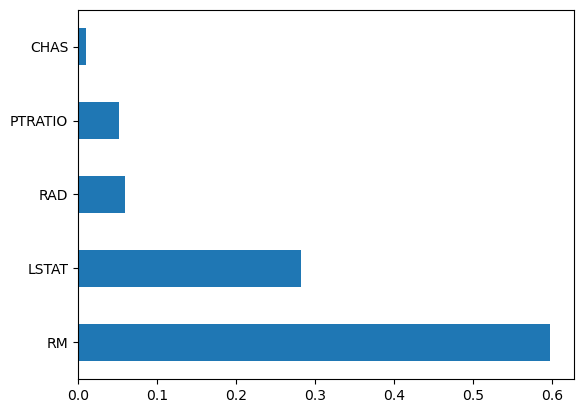

In [31]:
import time
T1=time.time()
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=4, criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)
# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])


# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a Decision Tree

In [32]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [33]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

digraph Tree {
node [shape=box] ;
0 [label="RM <= 0.644\nmse = 82.048\nsamples = 354\nvalue = 22.142"] ;
1 [label="LSTAT <= 0.35\nmse = 38.806\nsamples = 307\nvalue = 19.699"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="LSTAT <= 0.22\nmse = 23.097\nsamples = 181\nvalue = 23.088"] ;
1 -> 2 ;
3 [label="RAD <= 0.652\nmse = 29.44\nsamples = 98\nvalue = 25.03"] ;
2 -> 3 ;
4 [label="mse = 10.159\nsamples = 94\nvalue = 24.233"] ;
3 -> 4 ;
5 [label="mse = 117.187\nsamples = 4\nvalue = 43.75"] ;
3 -> 5 ;
6 [label="RAD <= 0.283\nmse = 5.904\nsamples = 83\nvalue = 20.796"] ;
2 -> 6 ;
7 [label="mse = 5.026\nsamples = 63\nvalue = 20.432"] ;
6 -> 7 ;
8 [label="mse = 6.933\nsamples = 20\nvalue = 21.945"] ;
6 -> 8 ;
9 [label="LSTAT <= 0.51\nmse = 21.156\nsamples = 126\nvalue = 14.829"] ;
1 -> 9 ;
10 [label="PTRATIO <= 0.729\nmse = 14.652\nsamples = 71\nvalue = 16.921"] ;
9 -> 10 ;
11 [label="mse = 8.44\nsamples = 20\nvalue = 20.18"] ;
10 -> 11 ;
12 [label="mse = 11.29\nsa

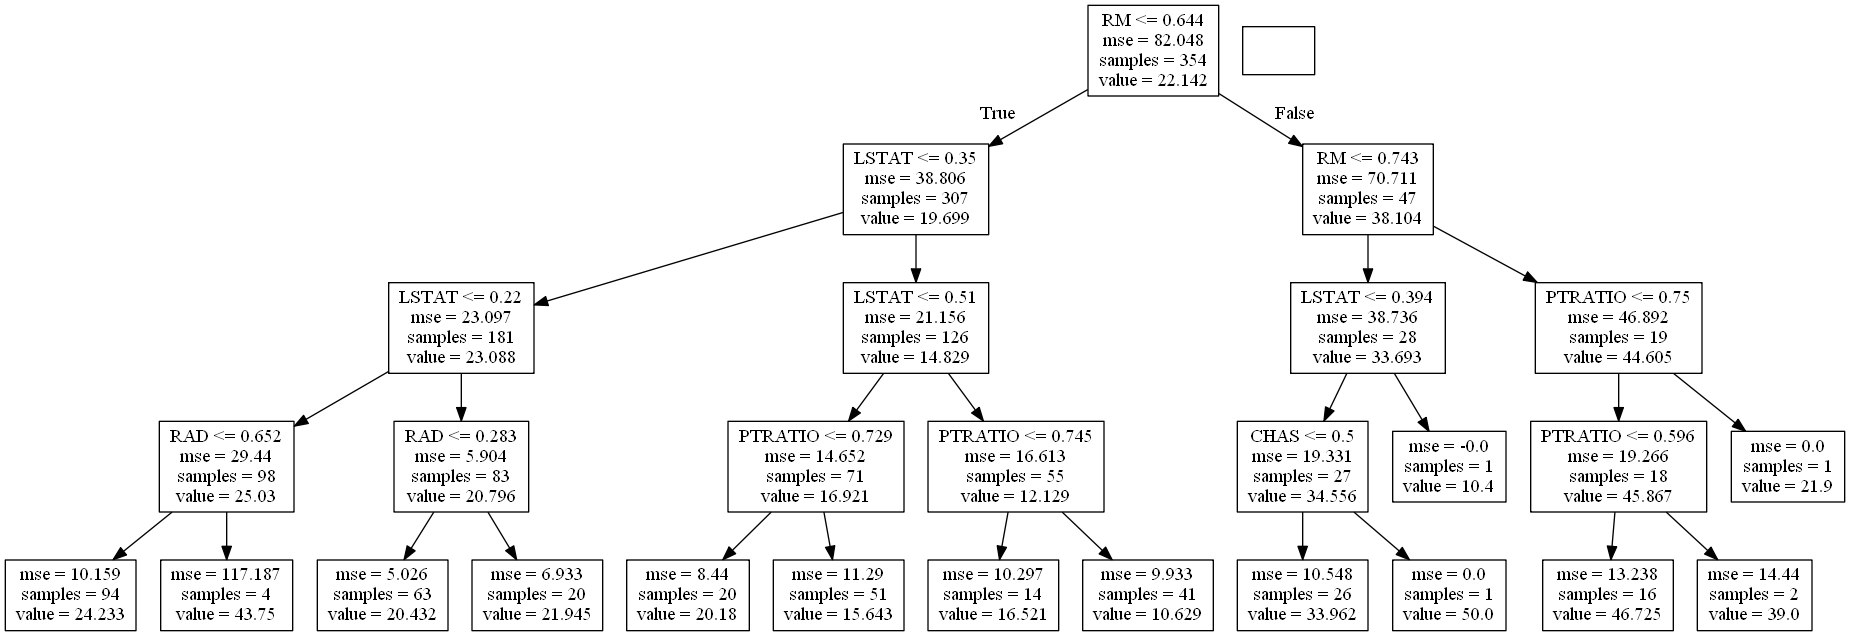

In [34]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

## 14.3. Random Forest

RandomForestRegressor(max_depth=5, n_estimators=300)
R2 Value: 0.917590018755721

##### Model Validation and Accuracy Calculations ######
   MEDV  PredictedMEDV
0  21.4           21.0
1   8.4           14.0
2  33.1           29.0
3  13.6           15.0
4  18.5           21.0
Mean Accuracy on test data: 85.64854909717181
Median Accuracy on test data: 89.95412844036697

Accuracy values for 10-fold Cross Validation:
 [89.0234118  93.61849241 87.49433149 88.30847322 89.15217375 91.16780433
 87.76598487 62.83526386 74.24710656 80.33731516]

Final Average Accuracy of the model: 84.4
Time taken: 5.373098611831665


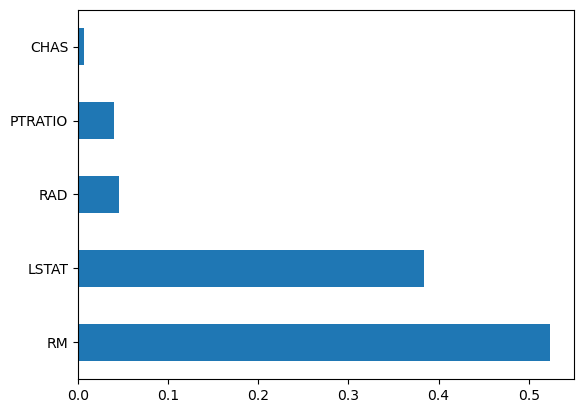

In [35]:
import time
T1=time.time()
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=300,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision Trees in Random Forest

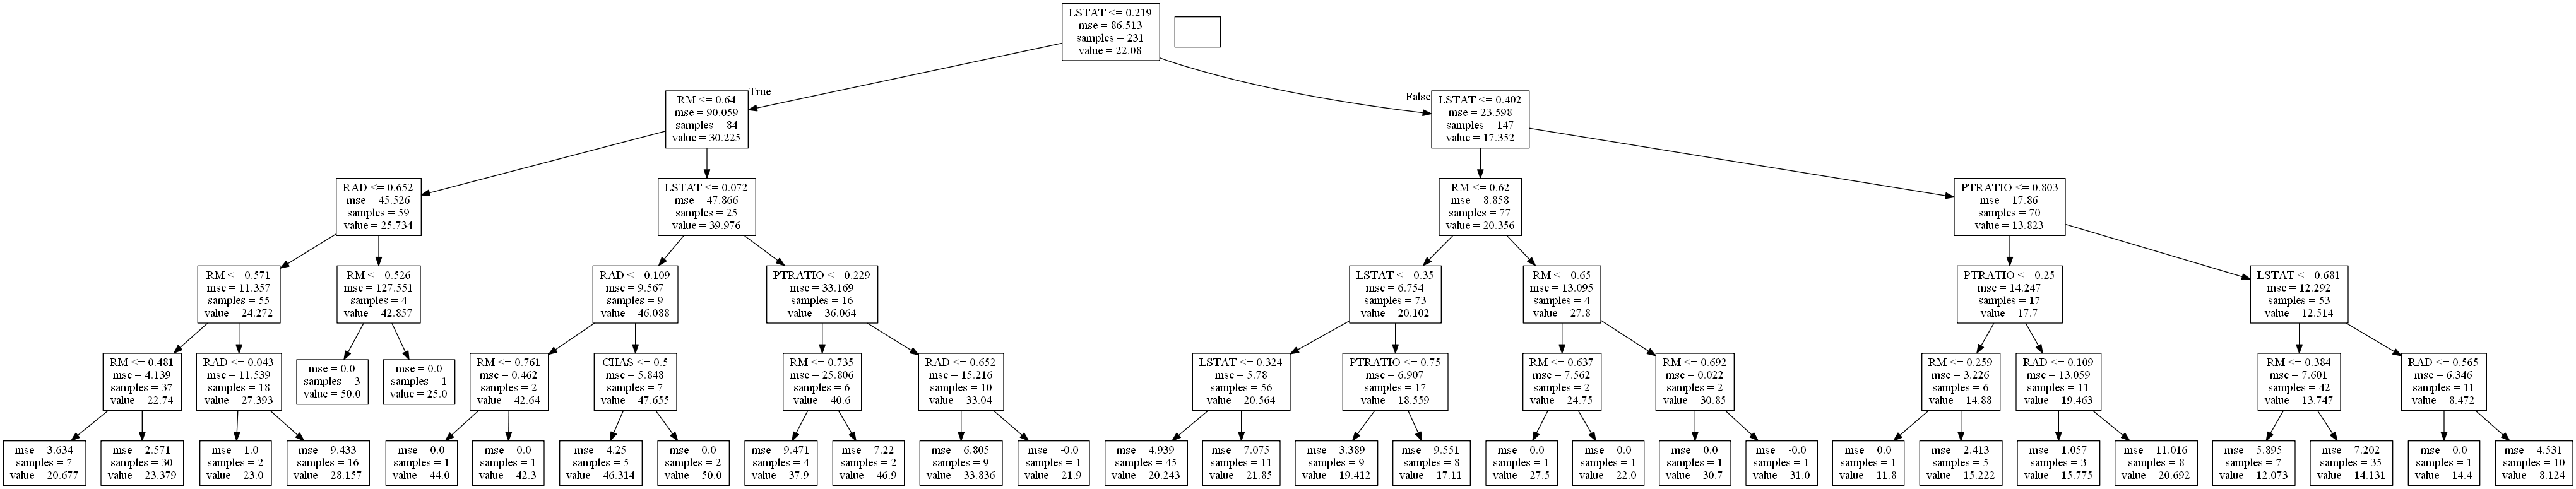

In [36]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1000,height=1000)
# Double click on the graph to zoom in

## 14.4. AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.01, n_estimators=100)
R2 Value: 0.9356715919981844

##### Model Validation and Accuracy Calculations ######
   MEDV  PredictedMEDV
0  21.4           21.0
1   8.4           12.0
2  33.1           28.0
3  13.6           15.0
4  18.5           21.0
Mean Accuracy on test data: 86.04860793864088
Median Accuracy on test data: 91.24802883532327

Accuracy values for 10-fold Cross Validation:
 [88.63486664 93.58194354 86.70777532 87.50208076 89.28580659 90.38093633
 87.71583844 61.54568185 74.80356182 80.79992825]

Final Average Accuracy of the model: 84.1
Time taken: 1.8015449047088623


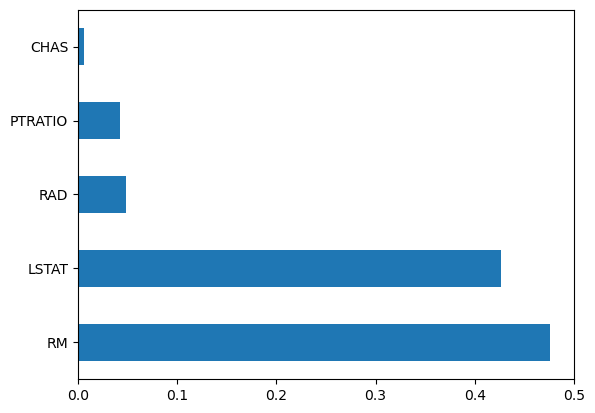

In [37]:
import time
T1=time.time()
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision trees from Adaboost

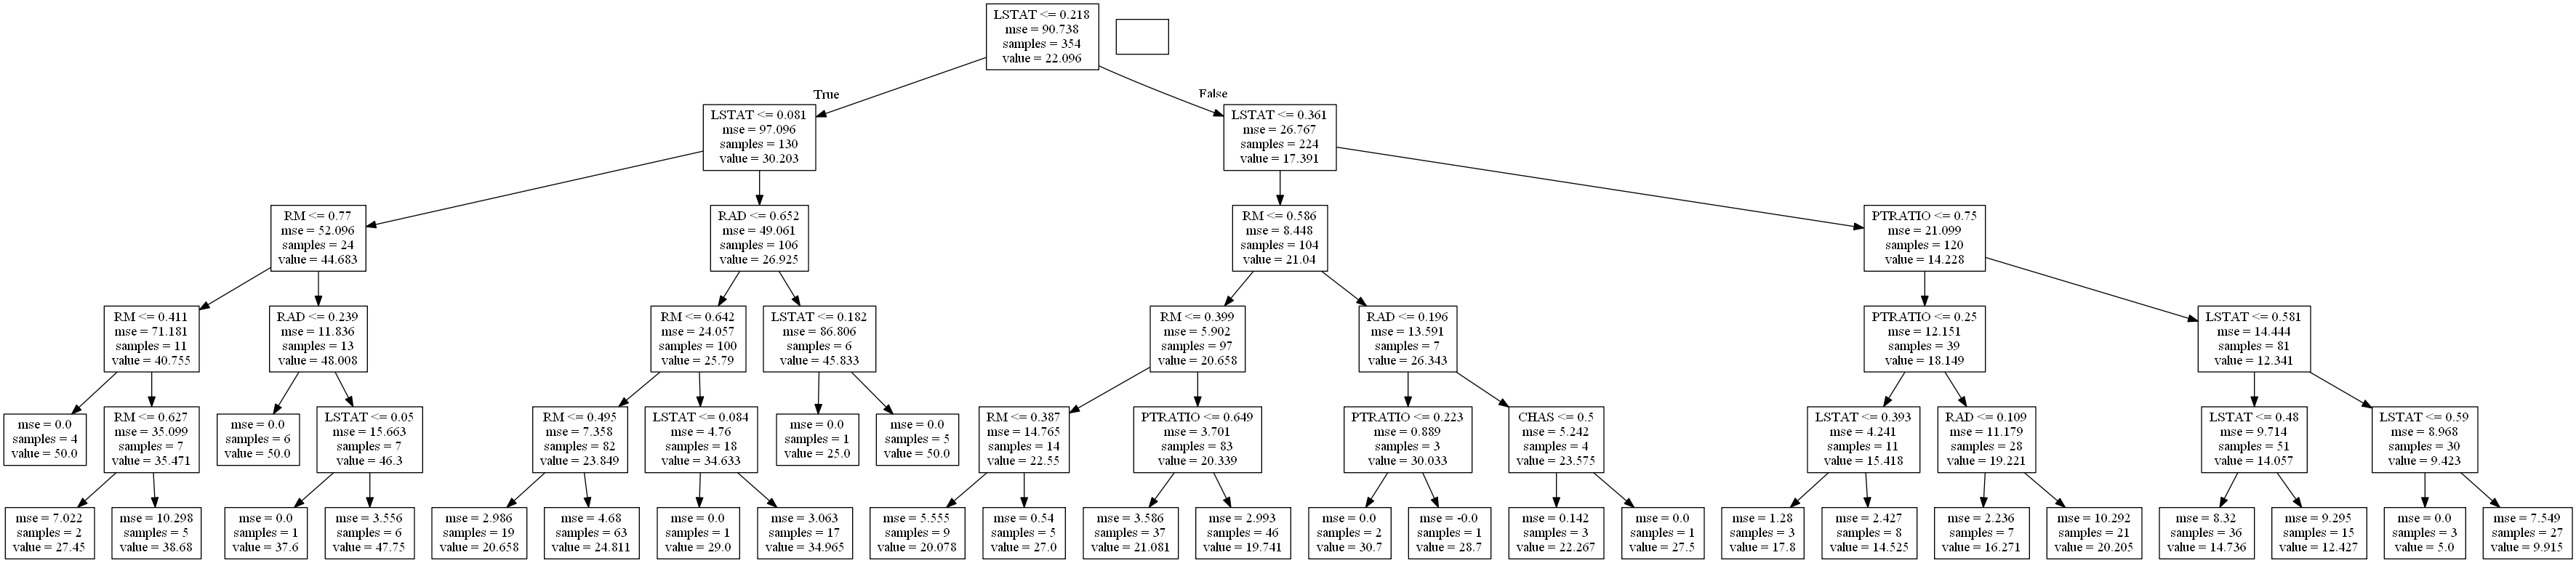

In [38]:
# PLotting 5th single Decision Tree from Adaboost
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)
# Double click on the graph to zoom in

## 14.5. XGBoost


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)
[20:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.99309445965384

##### Model Validation and Accuracy Calculations ######
  

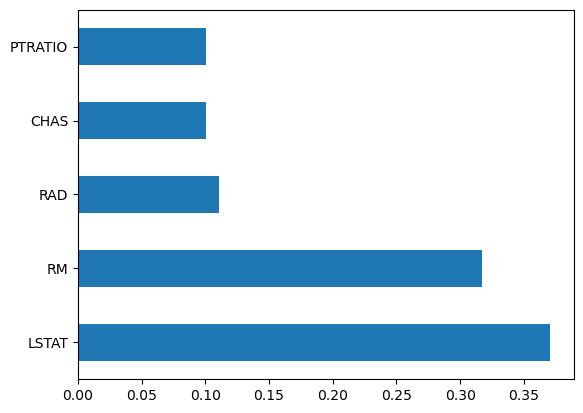

In [39]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=4, 
                      learning_rate=0.3, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

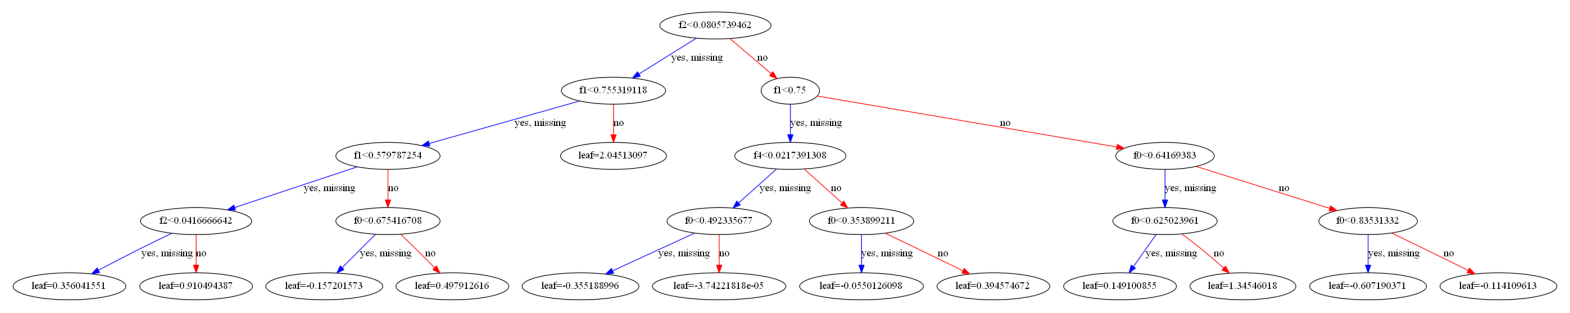

In [40]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=9, ax=ax)

## 14.6. KNN

In [41]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=7)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

KNeighborsRegressor(n_neighbors=7)
R2 Value: 0.7997366977497762

##### Model Validation and Accuracy Calculations ######
   MEDV  PredictedMEDV
0  21.4           19.0
1   8.4           15.0
2  33.1           28.0
3  13.6           15.0
4  18.5           19.0
Mean Accuracy on test data: 86.44229085904088
Median Accuracy on test data: 89.8876404494382

Accuracy values for 10-fold Cross Validation:
 [88.81102378 91.24338764 87.70683503 84.92103819 89.35903348 89.36097879
 88.30628489 63.77625461 74.83590555 80.93672077]

Final Average Accuracy of the model: 83.93
Time taken: 0.026696443557739258


## 15. Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.
​
I am choosing ADABOOST as the final model since it is producing the best accuracy and time on this data.
​
In order to deploy the model we follow below steps
​
* Train the model using 100% data available
* Save the model as a serialized file which can be stored anywhere
* Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

#### Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'RM', 'PTRATIO', 'LSTAT', 'RAD'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(506, 4)
(506,)


#### Cross validating the final model accuracy with less predictors

In [43]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.01)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [88.97677489 93.38490285 87.36570185 88.02341313 89.16150465 89.88735072
 87.91629297 61.76449427 75.3175184  80.85276702]

Final Average Accuracy of the model: 84.27


### Step 1. Retraining the model using 100% data

In [44]:
# Training the model on 100% Data available
Final_ADABOOST_Model=RegModel.fit(X,y)

### Step 2. Save the model as a serialized file which can be stored anywhere

In [45]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_ADABOOST_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_ADABOOST_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
#print('pickle file of Predictive Model is saved at Location:',os.getcwd())

### Step 3. Create a python function

In [46]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    #counting the number of rows
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
        
    # Converting binary nominal values to numeric 
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    #Predictors=['trend', 'hd', 'speed', 'ram','screen', 'premium']
    Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD']
    #print(InputData.head())
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    print(X)
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_ADABOOST_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [47]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[6,21,12.33,3],
     [6.575,15.3,4.98,6]],
    
columns=['RM', 'PTRATIO', 'LSTAT', 'RAD'])
    
print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

      RM  PTRATIO  LSTAT  RAD
0  6.000     21.0  12.33    3
1  6.575     15.3   4.98    6
[[ 6.    21.    12.33   3.   ]
 [ 6.575 15.3    4.98   6.   ]]


,Prediction
0,20.0
1,27.0


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the cases.

### Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js

### Creating the model with few parameters

#### Function for predictions API

In [48]:
# Creating the function which can take inputs and perform prediction
def FunctionGeneratePrediction(inp_RM, inp_PTRATIO, inp_LSTAT, inp_RAD):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_RM, inp_PTRATIO, inp_LSTAT, inp_RAD]],   
     columns=['RM', 'PTRATIO', 'LSTAT', 'RAD'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(inp_RM=6.6, 
                           inp_PTRATIO=15.3, 
                           inp_LSTAT=6.98,
                           inp_RAD=6,
                             )



[[ 6.6  15.3   6.98  6.  ]]


'{"Prediction":{"0":27.0}}'

In [49]:
# Installing the flask library required to create the API
#!pip install flask

#### Creating Flask API

In [50]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [51]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        RM_value=float(request.args.get('RM'))
        PTRATIO_value=float(request.args.get('PTRATIO'))
        LSTAT_value=float(request.args.get('LSTAT'))
        RAD_value=float(request.args.get('RAD'))
                       
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                        inp_RM=RM_value, 
                                        inp_PTRATIO=PTRATIO_value,
                                        inp_LSTAT=LSTAT_value,
                                        inp_RAD=RAD_value
                                                  )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))
#'RM', 'PTRATIO', 'LSTAT', 'RAD'

#### Starting the API engine

In [52]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit


### Sample URL to call the API

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?RM=6.3&PTRATIO=15.3&LSTAT=6.98&RAD=9